# Exploratory Data Analysis / Data Wrangling

A variable dictionary can be found at https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

In [312]:
# Read in dataframe and size
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
original_size = len(df)

The output variable I am interested in is one's ability to handle an unexpected financial expense. 

In [313]:
# Check how many null values our output variable has
np.sum((df['FWB1_1'] == -1) | (df['FWB1_1'] == -4))

11

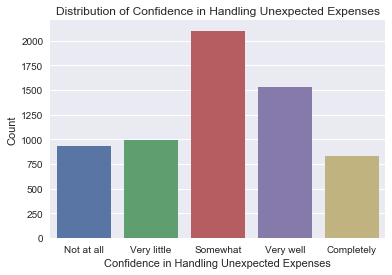

In [314]:
# Create a histogram of our target variable after removing null values
df = df[(df['FWB1_1'] != -1) & (df['FWB1_1'] != -4)]
sns.countplot(x='FWB1_1', data=df)
plt.title('Distribution of Confidence in Handling Unexpected Expenses')
plt.xlabel('Confidence in Handling Unexpected Expenses')
x_labels = ['Not at all', 'Very little', 'Somewhat', 'Very well', 'Completely']
plt.xticks(np.arange(5), x_labels)
_ = plt.ylabel('Count')

Because of the way this variable is distributed, I decided to turn it into a Boolean variable, with True corresponding to confidence in one's ability to handle an unexpected expense.

In [315]:
# True corresponds to confidence in ability to handle an unexpected financial expense
df['target'] = df['FWB1_1'] > 3

% of True Responses: 37.035876547078175
% of False Responses: 62.964123452921825


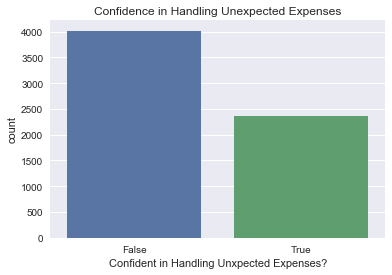

In [316]:
# Look at distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Confidence in Handling Unexpected Expenses')
_ = plt.xlabel('Confident in Handling Unxpected Expenses?')

# Print out percent True and False
percent_true = (np.sum(df['target'] == True)) / len(df)
percent_false = (np.sum(df['target'] == False)) / len(df)
print('% of True Responses: {}'.format(percent_true*100))
print('% of False Responses: {}'.format(percent_false*100))

I then removed the variables that weren't relevant to my analysis, either because they were other measures of financial well-being or their association with my target variable wouldn't lead to actionable recommendations. I wanted to include only those variables that were about behavior relevant to absorbing financial shocks or demographic data to allow us to identify more vulnerable populations.

In [317]:
# Remove columns that won't be used for our analysis

num_original_cols = len(df.columns)

# Financial well being scores (includes output variable)
fwb_cols = [col for col in df if col.startswith('FWB')]
# Life survey questions
swb_cols = [col for col in df if col.startswith('SWB')]
# Specific financial knowledge questions
kh_cols = [col for col in df if col.startswith('KHK')] + ['KHscore']
# Specific questions answered correctly
correct_cols = [col for col in df if col.endswith('correct')]
# Financial knowledge questions (included in summary variable)
finknowl_cols = [col for col in df if col.startswith('FINKNOWL')] + ['LMscore']
# Questions about number of children (already included in more relevant variable)
kid_cols = ['KIDS_1', 'KIDS_2', 'KIDS_3', 'KIDS_4']
# Household demographic data (already included in more relevant variable)
ppt_cols = [col for col in df if col.startswith('PPT')]
# Product related questions
prod_cols = [col for col in df if col.startswith('PROD')]
# Interconnections questions
connect_cols = [col for col in df if col.startswith('INTERCONNECTIONS')]
# Questions about experiencing shocks
shock_cols = [col for col in df if col.startswith('SHOCKS_')]
# Housing-related questions
housing_cols = ['HOUSING', 'LIVINGARRANGEMENT', 'HOUSERANGES', 'IMPUTATION_FLAG', 
                'VALUERANGES', 'MORTGAGE', 'HSLOC', 'HOUSESAT', 'VOLATILITY']
# Social Security questions
socsec_cols = ['SOCSEC1', 'SOCSEC2', 'SOCSEC3']
# Health-related questions
health_cols = ['CONNECT', 'HEALTH', 'DISCOUNT', 'MEMLOSS', 'DISTRESS']

datakeeping_cols = ['PUF_ID', 'sample', 'fpl', 'finalwt']
single_cols = ['EARNERS', 'SNAP', 'FRAUD2', 'PAIDHELP', 'EMPLOY', 'SUBNUMERACY1', 'SUBNUMERACY2', 'SUBKNOWL1', 
               'OBJNUMERACY1', 'MANAGE2', 'PAREDUC', 'LIFEEXPECT', 'MILITARY', 'RETIRE', 'PPREG4', 'PCTLT200FPL', 
               'OUTLOOK_1', 'OUTLOOK_2', 'GOALCONF', 'EMPLOY1_9']

cols_to_remove = fwb_cols + swb_cols + kh_cols + correct_cols + finknowl_cols + kid_cols + ppt_cols + prod_cols 
cols_to_remove = cols_to_remove + connect_cols + shock_cols + housing_cols + socsec_cols + health_cols 
cols_to_remove = cols_to_remove + datakeeping_cols + single_cols

df = df.drop(cols_to_remove, axis=1)

num_new_cols = len(df.columns)

# Create DataFrame for our independent variables
dfx = df.drop('target', axis=1)

print("Number of original columns:", num_original_cols)
print("Number of columns in new df:", num_new_cols)

Number of original columns: 218
Number of columns in new df: 89


In [318]:
df.head(10)

,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,...,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG9,target
0,44,3,3,4,3,3,3,4,4,3,...,1,4,1,1,1,7,3,1,8,False
1,43,3,3,3,3,4,3,2,4,3,...,3,2,1,1,2,6,3,1,3,False
2,42,3,3,3,3,3,3,3,3,3,...,3,3,2,1,3,6,3,1,9,False
3,42,3,3,3,3,3,3,3,3,3,...,3,2,1,1,1,8,3,1,7,False
4,42,3,3,3,3,3,3,3,3,3,...,4,2,3,1,5,7,1,1,4,False
5,57,4,4,4,4,3,4,4,4,4,...,4,4,1,1,2,7,1,1,3,True
6,54,4,4,3,3,3,4,4,5,4,...,3,4,4,2,5,7,1,1,4,False
7,35,2,3,3,2,2,4,2,4,3,...,4,1,1,2,3,4,4,1,4,False
8,58,4,5,5,4,3,5,4,4,4,...,3,1,3,2,4,7,1,1,7,True
9,42,3,2,2,3,2,3,4,4,3,...,3,2,1,1,3,8,1,1,2,False


In order to make the data more manageable, I looked for variables that I could remove because they were very closely and obviously related to our target. For example, the amount of money in savings. 

In [319]:
# Get info for plotting percentage of target being True for each category in a chosen column
def percentages_of_true_across_categories(column_name, data=df):
    
    # Calculate number of categories
    num_categories = len(data[column_name].unique())
    
    # Create table counting occurences of True and False for each category
    frequency_table = pd.crosstab(data[column_name], data['target'])
    
    # Generate x and y values
    x_vals = np.arange(num_categories) + 1
    
    # Initialize y values
    y_vals = np.empty(num_categories)
    # Loop through categories
    for i in np.arange(num_categories):
        # If variable is boolean
        if num_categories == 2:
            # Calculate percentage of respondents who responded True for each category
            y_vals[i] = frequency_table.loc[i, True] / np.sum(frequency_table.iloc[i,0:2])
        else:
            y_vals[i] = frequency_table.loc[i+1, True] / np.sum(frequency_table.iloc[i,0:2])
            
    return x_vals, y_vals

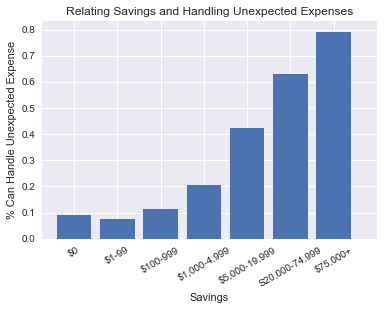

In [320]:
# Create bar graph of percentage of True responses for each category of savings

# Remove respondents who refused to answer
savings_df = df[(df['SAVINGSRANGES'] != -1) & (df['SAVINGSRANGES'] < 98)]

# Calculate x and y values
x_vals, y_vals = percentages_of_true_across_categories('SAVINGSRANGES', savings_df)

# Create bar graph 
plt.bar(x_vals, y_vals)
plt.title('Relating Savings and Handling Unexpected Expenses')
plt.xlabel('Savings')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels= ['$0', '$1-99', '$100-999', '$1,000-4,999', '$5,000-19,999', 'S20,000-74,999', '$75,000+']
plt.xticks(np.arange(8)+1, x_labels, rotation=30)
plt.show()

We see from both of these graphs that there is a clear effect of the amount one has in savings on one's confidence in being able to handle unexpected expenses, as we would of course intuitively expect. This is thus a variable that we don't want to include in our model. Closely related is the SAVEHABIT variable, or whether putting money into savings is a habit. 

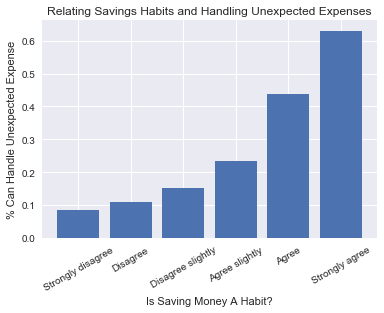

In [321]:
# Remove respondents who refused to answer
save_habit_df = df[df['SAVEHABIT'] != -1]

# Get x and y values
x_vals, y_vals = percentages_of_true_across_categories('SAVEHABIT', save_habit_df)

# Create bar graph
plt.bar(x_vals, y_vals)
plt.title('Relating Savings Habits and Handling Unexpected Expenses')
plt.xlabel('Is Saving Money A Habit?')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels = ['Strongly disagree', 'Disagree', 'Disagree slightly', 'Agree slightly', 'Agree', 'Strongly agree']
plt.xticks(x_vals, x_labels, rotation=30)
plt.show()

Another obviously correlated variable could be ABSORBSHOCK, or one's confidence in the ability to raise $2,000 in 30 days. 

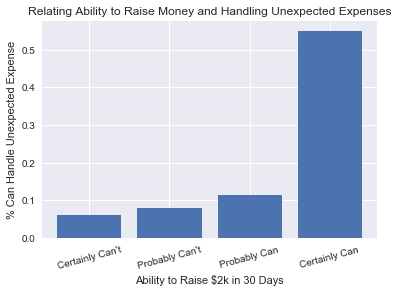

In [322]:
# Remove rows where response was 8 (corresponding to 'I don't know') or -1 (no response)
absorb_df = df[(df['ABSORBSHOCK'] != 8) & (df['ABSORBSHOCK'] != -1)]

# Calculate x and y values
x_vals, y_vals = percentages_of_true_across_categories('ABSORBSHOCK', absorb_df)

# Create bar graph 
plt.bar(x_vals, y_vals)
plt.title('Relating Ability to Raise Money and Handling Unexpected Expenses')
plt.xlabel('Ability to Raise $2k in 30 Days')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels = ['Certainly Can\'t', 'Probably Can\'t', 'Probably Can', 'Certainly Can']
plt.xticks(x_vals, x_labels, rotation=15)
plt.show()

Finally I wanted to look at ENDSMEET, or the difficulty of covering monthly expenses and bills.

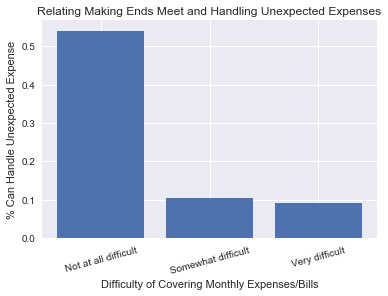

In [323]:
# Remove respondents who refused to answer
endsmeet_df = df[df['ENDSMEET'] != -1]

# Get x and y values
x_vals, y_vals = percentages_of_true_across_categories('ENDSMEET', endsmeet_df)

# Create bar graph 
plt.bar(x_vals, y_vals)
plt.title('Relating Making Ends Meet and Handling Unexpected Expenses')
plt.xlabel('Difficulty of Covering Monthly Expenses/Bills')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels = ['Not at all difficult', 'Somewhat difficult', 'Very difficult']
plt.xticks(x_vals, x_labels, rotation=15)
plt.show()

All of these graphs suggest we should remove their corresponding variables from our dataset. 

In [324]:
# Drop obviously related variables
dfx.drop(['SAVINGSRANGES', 'SAVEHABIT', 'ABSORBSHOCK', 'ENDSMEET'], axis=1, inplace=True)

A more interesting question would be whether income has this clear of an effect, or if financial management might be more important than how much you make. 

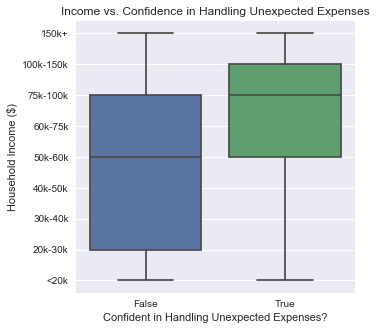

In [325]:
# Look at relationship between household income and confidence in ability to handle unexpected expenses
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='target', y='PPINCIMP', data=df)
plt.xlabel('Confident in Handling Unexpected Expenses?')
plt.ylabel('Household Income ($)')
plt.title('Income vs. Confidence in Handling Unexpected Expenses')
y_labels= ['<20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-75k', '75k-100k', '100k-150k', '150k+']
_ = plt.yticks(np.arange(9)+1, y_labels)

Again, as one would expect, lower income is associated with a lack of confidence in absorbing financial shocks while higher income is associated with the opposite. However, there is an interesting subset of the population where income doesn't seem to have a determinstic effect on our output variable, and other factors come into play. Let's look more closely at what incomes this happens at.

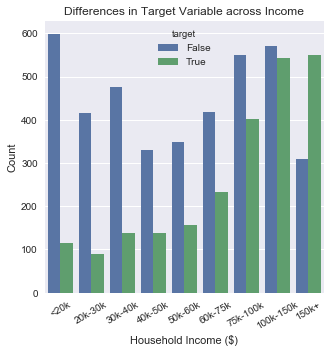

In [326]:
# Create plot comparing confidence across household income
sns.countplot(x='PPINCIMP', hue='target', data=df)
plt.xlabel('Household Income ($)')
plt.ylabel('Count')
plt.title('Differences in Target Variable across Income')
x_labels= ['<20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-75k', '75k-100k', '100k-150k', '150k+']
_ = plt.xticks(np.arange(9), x_labels, rotation=30)

We again see stark differences in how confident people are in handling unexpected expenses for most incomes. However, for people with incomes from $100k-150k, there seem to be other important factors determining this confidence, since the number of people who say they are confident and the number who say they aren't at this range are almost equal. Perhaps the most obvious possible explanation is household size. 

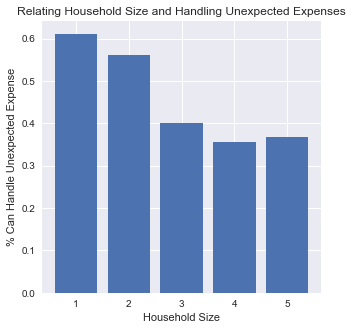

In [327]:
# Only include respondents with relevant income
subset_by_income = df[df['PPINCIMP'] == 8]

# Calculate x and y values
x_vals, y_vals = percentages_of_true_across_categories('PPHHSIZE', subset_by_income)

#Create bar graph 
plt.bar(x_vals, y_vals)
plt.title('Relating Household Size and Handling Unexpected Expenses')
plt.xlabel('Household Size')
plt.ylabel('% Can Handle Unexpected Expense')
plt.show()

We can see that increasing household size has a negative effect on one's confidence in handling unexpected expenses, but the effect is not too drastic. It could thus be useful to look for other behaviors that would be better predictors of our output variable than income our household size, particularly for the subset of respondents with an income between $100,000 and S149,999. 

Let's also look at some groupings of variables that are suggested by our data dictionary. For example, there are two groups of financial skill variables of size 7 and size 3 that are summarized by a financial skill score. However, some of these variables might not be very well correlated and worth distinguishing. 

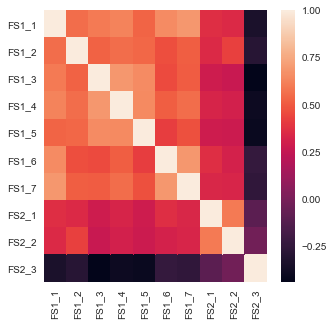

In [328]:
# Extract financial skill columns and use them to create a DataFrame
fs1_cols = [col for col in df if col.startswith('FS1')]
fs2_cols = [col for col in df if col.startswith('FS2')]
fs_cols = fs1_cols + fs2_cols

financial_skills_df = df[fs_cols]

# Create correlation matrix using Spearman method (ordinal variables) and heatmap
financial_skills_corr_matrix = financial_skills_df.corr(method='spearman')
_ = sns.heatmap(financial_skills_corr_matrix)

We can see that while the FS1 scores are moderately correlated with one another, the FS2 scores are less correlated with all of the scores (particularly FS2_3). Looking at the variable dictionary, we can see that the FS2 scores do not necessarily lead to actionable recommendations, so we can dispose of these. Checking the dictionary, we see that the FS1 variables make meaningful distinctions in behavior that would be useful in making recommendations. They are also only moderately correlated so we'd like to keep them instead of using a summary variable.

In [329]:
# Drop individual FS2 scores
dfx = dfx.drop(fs2_cols + ['FSscore'], axis=1)

When looking at the effect of these financial skills on confidence in handling unexpected expenses, the overall score will be more manageable and easier to use than 7 individual scores. 

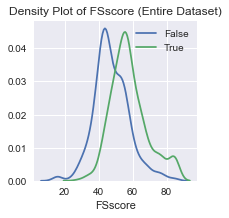

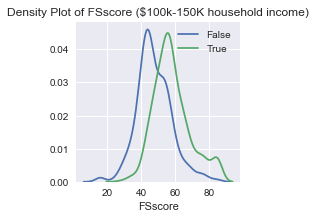

In [330]:
# Create density plot of financial skill score for entire dataset, colored by target 
g = sns.FacetGrid(subset_by_income, hue="target")
g = g.map(sns.distplot, "FSscore", hist=False)
plt.legend()
plt.title('Density Plot of FSscore (Entire Dataset)')

# Create density plot of financial skill score for $100k-150k income bracket, colored by target 
g = sns.FacetGrid(subset_by_income, hue="target")
g = g.map(sns.distplot, "FSscore", hist=False)
plt.legend()
_ = plt.title('Density Plot of FSscore ($100k-150K household income)')

We can see that moderate values are by far the most common. A higher score does seem to correspond to more confidence in handling unexpected expenses, but the effect is not drastic and there is considerable overlap between groups. This effect is consistent across the entire dataset and the $100k-150k income bracket.

Let's also look at some other possible groupings. There is a group of variables associated with financial planning, for example.

In [331]:
# Extract relevant columns and use them to create DataFrame
planning_cols = [col for col in df if col.startswith('PROPPLAN')]

planning_df = df[planning_cols]

# Create correlation matrix using Spearman method (ordinal variables) 
planning_corr_matrix = planning_df.corr(method='spearman')
planning_corr_matrix

,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4
PROPPLAN_1,1.000000,0.605300,0.474601,0.488235
PROPPLAN_2,0.605300,1.000000,0.590555,0.626030
PROPPLAN_3,0.474601,0.590555,1.000000,0.623693
PROPPLAN_4,0.488235,0.626030,0.623693,1.000000


We can see variables 1 and 2 are moderately correlated, as well as 3 and 4. Looking at the variable dictionary, we see that 1 and 2 have to do with keeping track of your budget, and 3 and 4 have to do with financial goals. However, I would say that 4 (having a plan of action for achieving financial goals) includes 3 (having financial goals) and 2 (considering how to stick to your budget) includes 1 (consulting your budget), so let's remove 1 and 3. 

In [332]:
# Remove redundant planning columns
dfx = dfx.drop(['PROPPLAN_1', 'PROPPLAN_3'], axis=1)

There is also a grouping related to money management we can inspect.

In [333]:
# Extract relevant columns and use them to create DataFrame
manage_cols = [col for col in df if col.startswith('MANAGE1')]

manage_df = df[manage_cols]

# Create correlation matrix using Spearman method (ordinal variables) 
manage_corr_matrix = manage_df.corr(method='spearman')
manage_corr_matrix

,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4
MANAGE1_1,1.000000,0.449185,0.465718,0.427331
MANAGE1_2,0.449185,1.000000,0.453673,0.419643
MANAGE1_3,0.465718,0.453673,1.000000,0.322690
MANAGE1_4,0.427331,0.419643,0.322690,1.000000


Since these variables are only moderately correlated, we'd like to keep them. However, MANAGE1_4 won't provide a very useful recommendation, so let's remove it.

In [334]:
# Remove MANAGE1_4 variable from our data set
dfx = dfx.drop('MANAGE1_4', axis=1)

Finally, we can look at variables related to materialism and self-control. 

In [335]:
# Extract relevant columns and use them to create DataFrame
materialism_cols = [col for col in df if col.startswith('MATERIALISM')]

materialism_df = df[materialism_cols]

# Create correlation matrix using Spearman method (ordinal variables) 
materialism_corr_matrix = materialism_df.corr(method='spearman')
materialism_corr_matrix

,MATERIALISM_1,MATERIALISM_2,MATERIALISM_3
MATERIALISM_1,1.000000,0.484030,0.622616
MATERIALISM_2,0.484030,1.000000,0.495582
MATERIALISM_3,0.622616,0.495582,1.000000


1 and 3 are moderately correlated, while 2 has low correlation with both. Let's remove 1 because it is slightly redundant given 3 and more easily leads to recommendations.

In [336]:
# Remove redundant materialism column
dfx = dfx.drop('MATERIALISM_1', axis=1)

# Extract relevant columns and create DataFrame containing them
self_control_cols = [col for col in df if col.startswith('SELFCONTROL')]

self_control_df = df[self_control_cols]

# Create a correlation matrix using Spearman method (ordinal variables)
self_control_corr_matrix = self_control_df.corr(method='spearman')
self_control_corr_matrix

,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3
SELFCONTROL_1,1.000000,-0.223181,-0.174319
SELFCONTROL_2,-0.223181,1.000000,0.443601
SELFCONTROL_3,-0.174319,0.443601,1.000000


We can see all of these variables are weakly correlated, so let's include all of them. 

There are also two variable dealing with retirement accounts whose values we would like to change. The default values are 0 (not automated), 1 (automated), and 2 (I do not have this type of account) for AUTOMATED_1 (a retirement savings account) and AUTOMATED_2 (a non-retirement savings account). We are more interested in whether a respondent has this type of account or not. We deal with null values by turning them into True values, since these are more common than False are.

In [337]:
# Create variables for having a savings account
dfx['SAVINGS_RETIREMENT'] = (dfx['AUTOMATED_1'] != 7)
dfx['SAVINGS_NON_RETIREMENT '] = (dfx['AUTOMATED_2'] != 7)
# Remove original columns
dfx.drop(['AUTOMATED_1', 'AUTOMATED_2'], axis=1, inplace=True)

Now we can deal with null values. All of our null values are now encoded as -1. 

In [338]:
# Create Boolean showing whether row contains any null values
row_contains_null = (dfx == -1).any(axis=1)
# See how many rows contain null values
num_nulls = np.sum(row_contains_null)

print('Number of rows with null values: {}'.format(num_nulls))
print('Number of total rows: {}'.format(len(dfx)))

Number of rows with null values: 1397
Number of total rows: 6383


We see that there a significant number of rows with at least one null value. Fortunately, when we look at the variable dictionary, we see that null values almost always account for less than 0.5% of responses, with an extremely rare maximum of 3%. In light of this rarity, I decided to impute the null values with the most common value of that variable instead of removing those respondents completely. 

In [339]:
# Replace -1 with NaNs
dfx.replace(-1, np.nan, inplace=True)
# Fill NA's with most common value for that variable
dfx = dfx.fillna(dfx.mode().iloc[0])
# Check how many null values we have left
dfx.isnull().sum().sum()

0

# Feature Selection

We'd like to do some scaling in prepraration for using shrinkage methods. Since our data is not normally distributed and doesn't contain outliers (the data are categorical or ordinal), we'll use min-max scaling.

In [340]:
from sklearn.preprocessing import MinMaxScaler

# Use a min-max scaler on our data
scaler=MinMaxScaler()
scaled_dfx = scaler.fit_transform(dfx)
scaled_dfx = pd.DataFrame(scaled_dfx, columns=dfx.columns)

# Inspect subset of scaled data
for col in scaled_dfx.columns[15:20]:
    print(col, scaled_dfx[col].unique())

FRUGALITY [ 1.   0.8  0.6  0.4  0.   0.2]
ASK1_1 [ 0.75  0.5   1.    0.    0.25]
ASK1_2 [ 0.5   0.25  0.75  0.    1.  ]
CHANGEABLE [ 0.5         0.16666667  0.83333333  0.          0.66666667  0.33333333
  1.        ]
CONSPROTECT1 [ 0.66666667  0.33333333  0.          1.        ]


I suspected that some of our coefficients were highly correlated, so I didn't want to default to using Lasso as our shrinkage method, which is sensitive to such a condition. I instead used Elastic Net with cross-validation to find a good L1 ratio. The L1 ratio ended up being low, significantly favoring Ridge regression as I anticipated.

In [341]:
from sklearn.linear_model import ElasticNetCV

# Create arrays for X and y values
X = scaled_dfx.values
y = df['target'].values

# Use ElasticNet with 5 cross-validation folds 
elastic_net = ElasticNetCV([.025, .05, .1, .25, .5, .75, .9], cv=10)
elastic_net.fit(X, y)
# Look at L1 ratio
elastic_net.l1_ratio_

0.25

In [342]:
# Create a list of tuples containing variables and their coefficients

# Initialize an empty list
coefficients = []

# Populate this list with variable names and absolute values of coefficients (for sorting)
for i, variable in enumerate(dfx.columns):
    coefficients.append((variable, abs(elastic_net.coef_[i])))
    
# Sort the variables from highest to lowest coefficient values
coefficients.sort(key=lambda x: x[1], reverse=True)

# Look at top 10 variables
coefficients[:10]

[('ACT1_2', 0.30234376880906744),
 ('MANAGE1_3', 0.18446364832344025),
 ('FS1_7', 0.17735456762921867),
 ('PPINCIMP', 0.17453589546351023),
 ('FS1_2', 0.13320024834619423),
 ('MATHARDSHIP_6', 0.10823321068162108),
 ('PROPPLAN_2', 0.099392056940950727),
 ('FS1_5', 0.094542035485121245),
 ('SCFHORIZON', 0.088641958630620341),
 ('FS1_6', 0.082958620836839636)]

Interestingly, the only demographic variable to appear is income. Let's split our variables into two groups: those related to financial behaviors/attitudes and demographic variables. Then we can see how often they appear in the top variables. 

In [343]:
# Extract financial and demographic columns
financial_cols = list(dfx.loc[:,'FS1_1':'PEM'].columns) + ['SAVINGS_RETIREMENT', 'SAVINGS_NON_RETIREMENT']
demographic_cols = list(dfx.loc[:,'HHEDUC':'PPREG9'].columns)

# Look at top 10, 20, and 30 variables
for n in [10, 20, 30]:
    # Initialize count to 0
    demographic_count = 0
    
    for pair in coefficients[:n]:
        # If variable name is demographic
        if pair[0] in demographic_cols:
            # Add 1 to our count
            demographic_count += 1

    print("Demographic variables in top {} variables: {}".format(n, demographic_count))

Demographic variables in top 10 variables: 1
Demographic variables in top 20 variables: 4
Demographic variables in top 30 variables: 9


In [361]:
# Get top demographic variables

# Initialize empty list
demographic_x = []

# Collect top demographic variables from top 20
for pair in coefficients[:20]:
    if pair[0] in demographic_cols:
        demographic_x.append(pair[0])

# Look at top demographic variables
print(demographic_x)

['PPINCIMP', 'EMPLOY1_5', 'PPHHSIZE', 'Military_Status']


In [362]:
# Get top financial variables

# Initialize empty list
financial_x = []

# Collect top financial variables from top 5
for pair in coefficients[:5]:
    if pair[0] in financial_cols:
        financial_x.append(pair[0])

# Look at top demographic variables
print(financial_x)

['ACT1_2', 'MANAGE1_3', 'FS1_7', 'FS1_2']


We see that income, household size, whether the respondent is a student, and age are the 3 variables most associated with our target variable (according to elastic net). Looking at financial behaviors, we see that the top variables are following through on financial goals, the frequency of paying off one's monthly credit balance, income, knowing how to save, and knowing where to go for financial advice. Knowing to how to save is a bit too obvious, so we can dispense with this variable and add another variable. I decided skip the next highest variable, about utilities being shut off because of non-payment, and add the one after it related to budgeting because its relationship to our other variables was more interesting. Let's examine the multicollinearity of these variables using their VIFs.

In [386]:
# Prepare data for calculating VIF factors

# Create DataFrame of financial variables
financial_df = dfx[financial_x]
# Turn into array
X_financial = financial_df.values

# Create DataFrame of demographic variables
demographic_df = dfx[demographic_x]
# Turn into array
X_demographic = demographic_df.values

In [387]:
# Aggregate financial and demographic data
x_list = financial_x + demographic_x
# Create DataFrame of both groups of variables 
subset_df = dfx[x_list]
# Turn into array
X = subset_df.values

# Look at VIFs for aggregated data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = subset_df.columns
vif

,VIF,features
0,30.703462,ACT1_2
1,8.314138,MANAGE1_3
2,28.282349,FS1_7
3,17.769152,FS1_2
4,5.985020,PPINCIMP
5,1.058268,EMPLOY1_5
6,5.154544,PPHHSIZE
7,11.635814,Military_Status


There is a lot of multicollinearity in the aggregated data, so I removed variables with the highest VIFs, sometimes removing the less interesting variable if scores were close, until all of them were sufficiently low (<10).

In [388]:
# Remove variables with high VIFs
x_list.remove('ACT1_2')

# Create DataFrame of both groups of variables 
subset_df = dfx[x_list]
# Turn into array
X = subset_df.values

# Look at VIFs for aggregated data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = subset_df.columns
vif

,VIF,features
0,7.833288,MANAGE1_3
1,20.815990,FS1_7
2,16.347400,FS1_2
3,5.970706,PPINCIMP
4,1.058211,EMPLOY1_5
5,5.136591,PPHHSIZE
6,11.125703,Military_Status


In [389]:
# Remove variables with high VIFs
x_list.remove('FS1_7')

# Create DataFrame of both groups of variables 
subset_df = dfx[x_list]
# Turn into array
X = subset_df.values

# Look at VIFs for aggregated data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = subset_df.columns
vif

,VIF,features
0,6.880089,MANAGE1_3
1,11.238580,FS1_2
2,5.912018,PPINCIMP
3,1.058115,EMPLOY1_5
4,5.103822,PPHHSIZE
5,10.237828,Military_Status


In [390]:
# Remove variables with high VIFs
x_list.remove('Military_Status')

# Create DataFrame of both groups of variables 
subset_df = dfx[x_list]
# Turn into array
X = subset_df.values

# Look at VIFs for aggregated data
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = subset_df.columns
vif

,VIF,features
0,6.657379,MANAGE1_3
1,8.935435,FS1_2
2,5.876181,PPINCIMP
3,1.053330,EMPLOY1_5
4,4.122263,PPHHSIZE


Because I was still interested in the ACT1_2, I found another set of variables which contained ACT1_2 that had low enough VIFs (<10) that the issue of multicollinearity would not be very problematic.

In [406]:
x_list = ['ACT1_2', 'MANAGE1_3', 'PPINCIMP', 'EMPLOY1_5'] 

# Create DataFrame of financial variables
subset_df = dfx[x_list]
# Turn into array
X_subset = subset_df.values

# Recalculate VIFs
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_subset, i) for i in range(X_subset.shape[1])]
vif["features"] = subset_df.columns
vif

,VIF,features
0,9.601904,ACT1_2
1,7.902008,MANAGE1_3
2,5.374284,PPINCIMP
3,1.040406,EMPLOY1_5


Now that we have a list of variables we might want to include in our model, we can look at their relationship with out output variable (keeping in mind these single-variable analyses are done without considering the effect of any other variables).

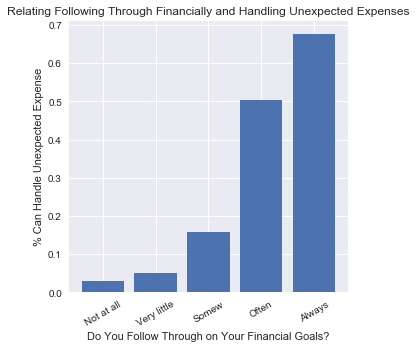

In [392]:
# Remove respondents who refused to answer
act_df = df[df['ACT1_2'] != -1]

# Get x and y values
x_vals, y_vals = percentages_of_true_across_categories('ACT1_2', act_df)

# Create bar graph
plt.bar(x_vals, y_vals)
plt.title('Relating Following Through Financially and Handling Unexpected Expenses')
plt.xlabel('Do You Follow Through on Your Financial Goals?')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels = ['Not at all', 'Very little', 'Somew', 'Often', 'Always']
plt.xticks(x_vals, x_labels, rotation=30)
plt.show()

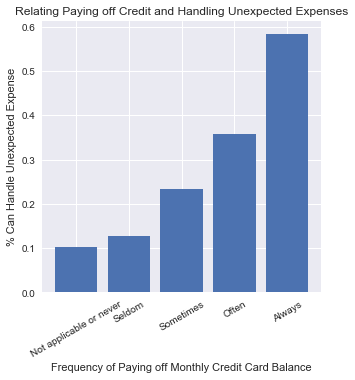

In [393]:
# Remove respondents who refused to answer
manage_df = df[df['MANAGE1_3'] != -1]

# Get x and y values
x_vals, y_vals = percentages_of_true_across_categories('MANAGE1_3', manage_df)

# Create bar graph
plt.bar(x_vals, y_vals)
plt.title('Relating Paying off Credit and Handling Unexpected Expenses')
plt.xlabel('Frequency of Paying off Monthly Credit Card Balance')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels = ['Not applicable or never', 'Seldom', 'Sometimes', 'Often', 'Always']
plt.xticks(x_vals, x_labels, rotation=30)
plt.show()

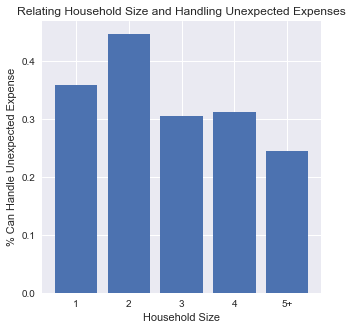

In [395]:
# Remove respondents who refused to answer
hh_df = df[df['PPHHSIZE'] != -1]

# Get x and y values
x_vals, y_vals = percentages_of_true_across_categories('PPHHSIZE', hh_df)

# Create bar graph
plt.bar(x_vals, y_vals)
plt.title('Relating Household Size and Handling Unexpected Expenses')
plt.xlabel('Household Size')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels = ['1', '2', '3', '4', '5+']
plt.xticks(x_vals, x_labels)
plt.show()

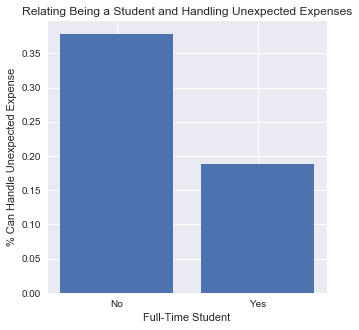

In [396]:
# Get x and y values
x_vals, y_vals = percentages_of_true_across_categories('EMPLOY1_5', df)

# Create bar graph
plt.bar(x_vals, y_vals)
plt.title('Relating Being a Student and Handling Unexpected Expenses')
plt.xlabel('Full-Time Student')
plt.ylabel('% Can Handle Unexpected Expense')
x_labels = ['No', 'Yes']
plt.xticks(x_vals, x_labels)
plt.show()

We can see that most of these variables are very clearly associated with our target variable. The only slight exception is household size. However, his might interact with the other variables in a way that is predictive of confidence in handling unexpected expenses. For example, we see a clear pattern between household size and our output variable for people with incomes from $100k-150k.